In [1]:
from scipy.stats.qmc import LatinHypercube as LHSampler
from matplotlib import pyplot as plt
import numpy as np
from src.utils import plotLHS, concat, H, F
from src.eLHS_old import *
import json
from math import floor, ceil

# setup sampler
LHS = LHSampler(d = 2)
err = 1e-9

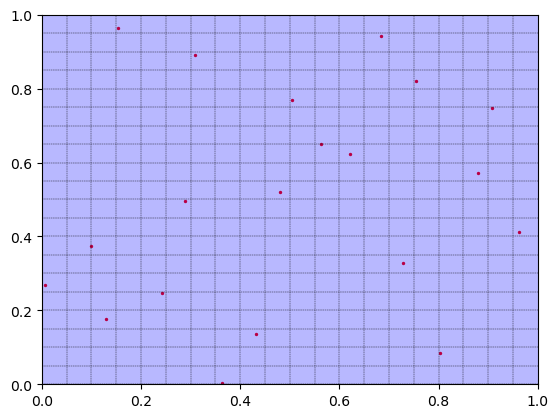

Grade (mode 3):  1.0


In [3]:
# could be interesting which distribution the PeLHS grade has while varying M and N
N1, M1 = 20, 14
ss2 = LHS.random(N1)
plotLHS(ss2, grid=True, highlight=True)
print("Grade (mode 3): ", grade(ss2))

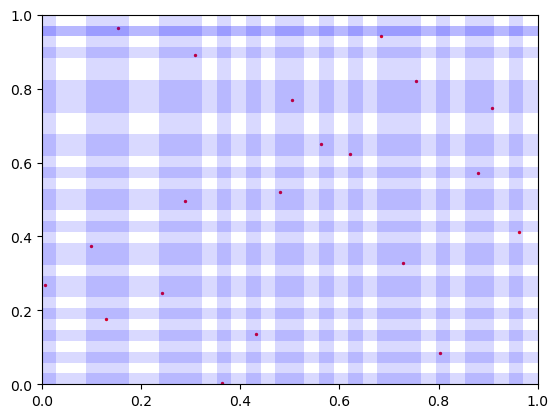

Partial grade 1:  0.5735294117647058
Partial grade 3:  0.5735294117647058


In [4]:
# plotting the partial-eLHS ("Partiale")
pss2 = empty_expansion(ss2, M1)
plotLHS(pss2, grid=False, highlight=True)
print("Partial grade 1: ", grade(pss2, n = N1 + M1, mode=1))
print("Partial grade 3: ", grade(ss2, n = N1 + M1, mode=3))


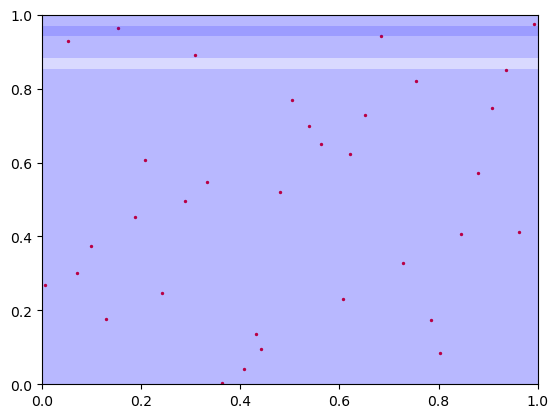

LHS grade: 	 20.0
PeLHS grade: 	 0.5735294117647058
eLHS grade: 	 0.9852941176470589
Total Upgrade: 	 0.41176470588235303  | Expected:  0.4117647058823529  |  ✅


In [5]:
exp = eLHS(ss2, M1)
elhs2 = concat(ss2, exp["expansion"])
plotLHS(elhs2, False, True)

exp_up = M1/(N1 + M1)
print("LHS grade: \t", grade(ss2) * N1)
print("PeLHS grade: \t", grpss2 := grade(ss2, n = N1 + M1))
print("eLHS grade: \t", grelhs2 := exp['grade'])
print("Total Upgrade: \t" , grelhs2 - grpss2, " | Expected: ", exp_up, " | ", 
      ("✅" if -err < grelhs2 - grpss2 - exp_up < err else "❌"))


### TEST PLAYGROUND

Limited Sample Size Problem

## Experiment: max gr(s, Q)

In [6]:
N, P = 100, 3
s = LHS.random(N)

In [7]:
K = 4
qs = np.arange(0, K * N + 1)
ys = np.array([ grade(s, n = N + q, mode = 3) + q/(N + q) for q in qs ])

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "/Users/alessandro/anaconda3/envs/lab/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3508, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/var/folders/qb/x31gb2kj3xx7mx6fqbcsvzp00000gn/T/ipykernel_77842/94001764.py", line 3, in <module>
    ys = np.array([ grade(s, n = N + q, mode = 3) + q/(N + q) for q in qs ])
                  ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/var/folders/qb/x31gb2kj3xx7mx6fqbcsvzp00000gn/T/ipykernel_77842/94001764.py", line 3, in <listcomp>
    ys = np.array([ grade(s, n = N + q, mode = 3) + q/(N + q) for q in qs ])
                    ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/alessandro/Projects/~LAB/Thesis/src/eLHS_old.py", line 99, in grade
    y = count_fingerprints(lhs, verbose=False)
        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/alessandro/Projects/~LAB/Thesis/src/eLHS_old.py", line 75, in count_fingerprints
    h = tr

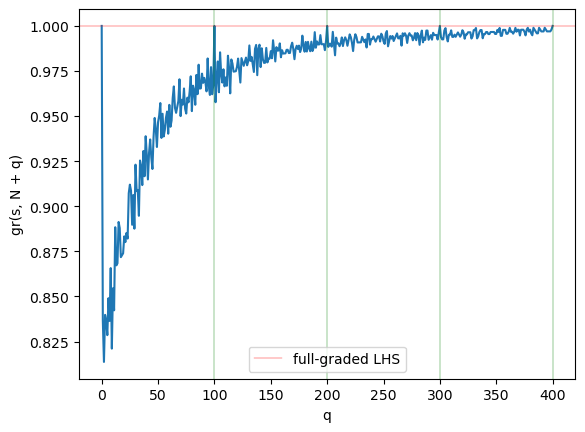

In [ ]:

# plt.scatter(qs, ys, s = 1)
plt.plot(qs, ys)
plt.xlabel("q")
plt.ylabel("gr(s, N + q)")
plt.axhline(1, color='red', linestyle='-', linewidth = 0.3, label = "full-graded LHS")
for k in range(1, K + 1):
    plt.axvline(k * N, color='green', linestyle='-', linewidth = 0.3)
plt.legend()
plt.show()


In [ ]:
# finding the optimal Qs
xys = np.column_stack([qs, ys])
Qs = np.array(xys[xys[:, 1] == 1] [:, 0], dtype=int)
print(Qs)


[  0 100 200 300 400]


In [ ]:
painQs = Qs[Qs[:] % N != 0]

if len(painQs) > 0:
    for q in painQs:
        expansion = eLHS(s, q)
        print("-" * 20)
        print("N: ", N, "\tQ: ", q)
        print("Is it a full-grade expansion?", expansion["grade"], " | ", 
            "✅" if expansion["grade"] == 1.0 else "❌")
else:
    print(" ⚠️ We found no non-trivial expansion")
    

 ⚠️ We found no non-trivial expansion


### 1000 samples LSSP experiment

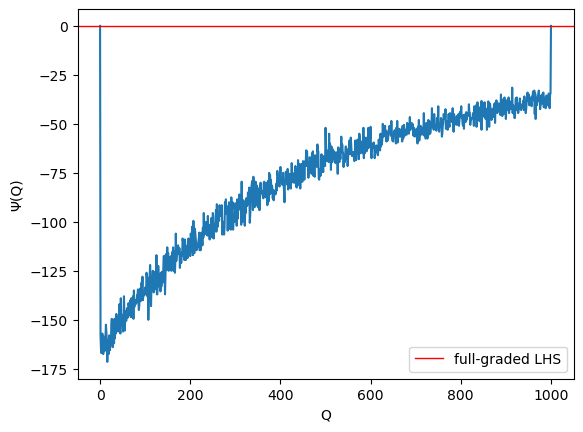

In [ ]:

with open('data/PSI-1000-experiment.json') as f:
    e = json.load(f)
    xys = np.array(e['xys'])
    plt.plot(xys[:, 0], xys[:, 1])
    plt.xlabel("Q")
    plt.ylabel("Ψ(Q)")
    plt.axhline(0, color='red', linestyle='-', linewidth = 1, label = "full-graded LHS")
    plt.legend()
    plt.show()

### Expanded Grade Prediction

In [ ]:
def expandedGrade(lhs: np.ndarray, M: int):
    N, P = lhs.shape
    return 1 - np.sum(overlaps(lhs, M)) / (P * (N + M))

def overlaps(lhs: np.ndarray, M: int):
    N, P = lhs.shape
    ovs = np.zeros((P))
    for j in range(P):
        xs = np.sort(lhs[:, j])
        for i in range(N - 1):
            ovs[j] += H(ceil(xs[i] * (N + M)) / (N + M) - xs[i+1])
    return ovs


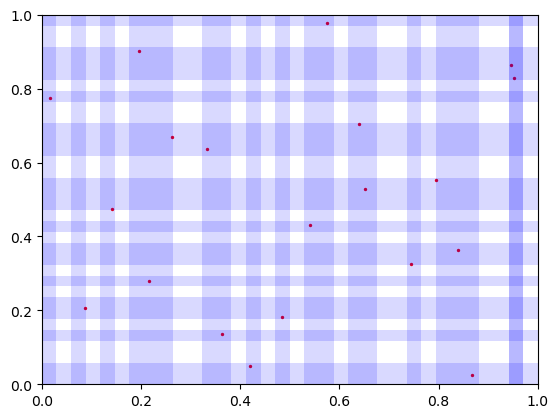

Overlaps:  [1. 0.]


In [ ]:
N3, M3 = 20, 14
ss3 = LHS.random(N3)
# plotting the empty expansion of ss3
plotLHS(empty_expansion(ss3, M3), grid = False, highlight = True)
print("Overlaps: ", overlaps(ss3, M3))

In [ ]:
prediction = expandedGrade(ss3, M3)
exp3 = eLHS(ss3, M3)
elhs3 = concat(ss3, exp3["expansion"])
print(prediction, exp3["grade"], "✅" if -err < prediction - exp3["grade"] < err else "❌")

0.9852941176470589 0.9852941176470589 ✅


In [ ]:
pain1 = np.array([
    [0.125, 0.125],
    [0.375, 0.375],
    [0.625, 0.625],
    [0.875, 0.875]
])

pain2 = np.array([ [pain1[i][0], pain1[i][1], (2*i + 1/ (2 * len(pain1))) ] for i in range(len(pain1)) ])

print(grade(pain1))
print(grade(pain2))



# grade(pain)
# plotLHS(pain, True, True)

1.0
0.75


## NICE PLOTS

### TEMPORARY function for plotting better

In [20]:

def tmpplotLHS(lhs: np.ndarray, grid: bool = False, highlight: bool = False, save: bool = False, filepath: str = None):
    N, P = lhs.shape
    if P != 2:
        return
    plt.xlim(0, 1)
    plt.ylim(0, 1)
    plt.scatter(lhs[:, 0], lhs[:, 1], marker='o', c='r', s=20)
    if grid:
        for q in range(0, N):
            plt.axhline(y=q/N, color='black', linestyle='--', linewidth=0.3)
            plt.axvline(x=q/N, color='black', linestyle='--', linewidth=0.3)
    # floor(coord/interval_size) = interval_index (starting from zero)
    if highlight:
        timestep = 1/N
        for i in range(N):
            try:
                if lhs[i, 0] is None or lhs[i, 0] is None or np.isnan(lhs[i, 0]) or np.isnan(lhs[i, 1]):
                    continue
                qh = floor(lhs[i, 0]/timestep)
                qv = floor(lhs[i, 1]/timestep)
                plt.axvspan(qh/N, (qh+1)/N, facecolor='blue', alpha=0.15)
                plt.axhspan(qv/N, (qv+1)/N, facecolor='blue', alpha=0.15)
            except:
                continue
    if save and filepath is not None:
        plt.savefig(filepath)
    else:
        plt.show()

### Real plots ahead

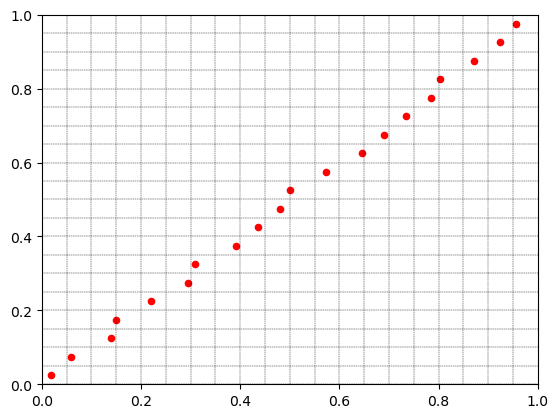

In [24]:
# poor LHS sampling: diagonal design
N_diag = 20
# diag = np.array([ [(2*i + 1)/(2*N_diag), (2*i + 1)/(2*N_diag)] for i in range(N_diag)])
diag = np.array([ i/N_diag for i in range(N_diag)])
diag = np.column_stack((diag + np.random.uniform(0,1/N_diag,N_diag), diag + np.random.normal(1/(2*N_diag),10e-8, N_diag)))
tmpplotLHS(diag, True, False)


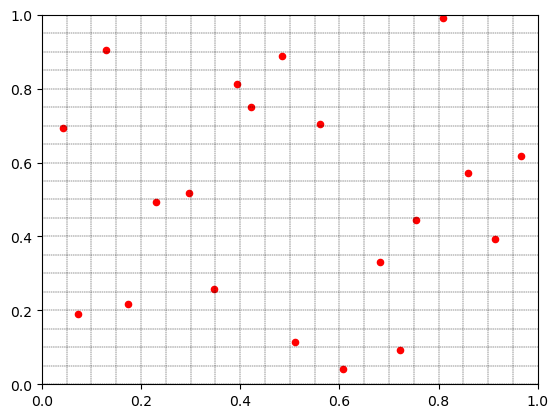

In [34]:
# good LHS
good_LHS = LHS.random(N_diag)
tmpplotLHS(good_LHS, True, False)